### Carregando as bibliotecas

In [ ]:
from sklearn.datasets import load_wine

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando o conjunto de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/adult.csv", header=0)

###Analise das colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###Remoção de colunas

Como a coluna fnlwgt tem mais relação com o censo do que a características pessoais dos indivíduos, pra classificação ela seria desnecessária

In [ ]:
df = df.drop(['fnlwgt'], axis=1)

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###Valores nulos

In [ ]:
df.isnull().sum()

,0
age,0
workclass,963
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0
capital-gain,0


Como as colunas que possuem dados nulos sao categoricas, resolvi preencher com outra categoria, "Unknown".

In [ ]:
colunas_categoricas = ['workclass', 'occupation', 'native-country']
df[colunas_categoricas] = df[colunas_categoricas].fillna('Unknown')


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0
capital-gain,0


###Valores duplicados

Resolvi retirar as linhas duplicadas já que esse data set posui colunas que têm dados mais específicos, como capital-gain e capital-loss. O que daria para inferir que, se a linha for totalmente igual a outra significa que o registro é repetido.

In [ ]:
df.duplicated().sum()

np.int64(4487)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

###Valores categóricos para numéricos

Como as colunas "sex" e "income" possuem somente duas opções de dados, resolvi deixar a classificação binária

In [ ]:
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

Já as colunas que possuem mais de duas opções, considerei realizar o one-hot encoding já que, nenhuma das colunas possuia nenhum tipo de ordenação nos seus dados. Mas, por causa da grande quantidade de opções para cada coluna, o tamanho do dataset ficaria absurdamente grande, deixando a análise mais difícil. Então, optei pelo label encoding, para classificar as colunas abaixo.

In [ ]:
colunas = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
le = LabelEncoder()

for col in colunas:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,Bachelors,13,4,1,1,4,1,2174,0,40,39,0.0
1,50,6,Bachelors,13,2,4,0,4,1,0,0,13,39,0.0
2,38,4,HS-grad,9,0,6,1,4,1,0,0,40,39,0.0
3,53,4,11th,7,2,6,0,2,1,0,0,40,39,0.0
4,28,4,Bachelors,13,2,10,5,2,0,0,0,40,5,0.0


###Exploração dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44355 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             44355 non-null  int64  
 1   workclass       44355 non-null  int64  
 2   education       44355 non-null  object 
 3   education-num   44355 non-null  int64  
 4   marital-status  44355 non-null  int64  
 5   occupation      44355 non-null  int64  
 6   relationship    44355 non-null  int64  
 7   race            44355 non-null  int64  
 8   sex             44355 non-null  int64  
 9   capital-gain    44355 non-null  int64  
 10  capital-loss    44355 non-null  int64  
 11  hours-per-week  44355 non-null  int64  
 12  native-country  44355 non-null  int64  
 13  income          29096 non-null  float64
dtypes: float64(1), int64(12), object(1)
memory usage: 5.1+ MB


É possível perceber uma forte correlação negativa entre "sex" e "relationship" e uma relação positiva entre education-num e income.

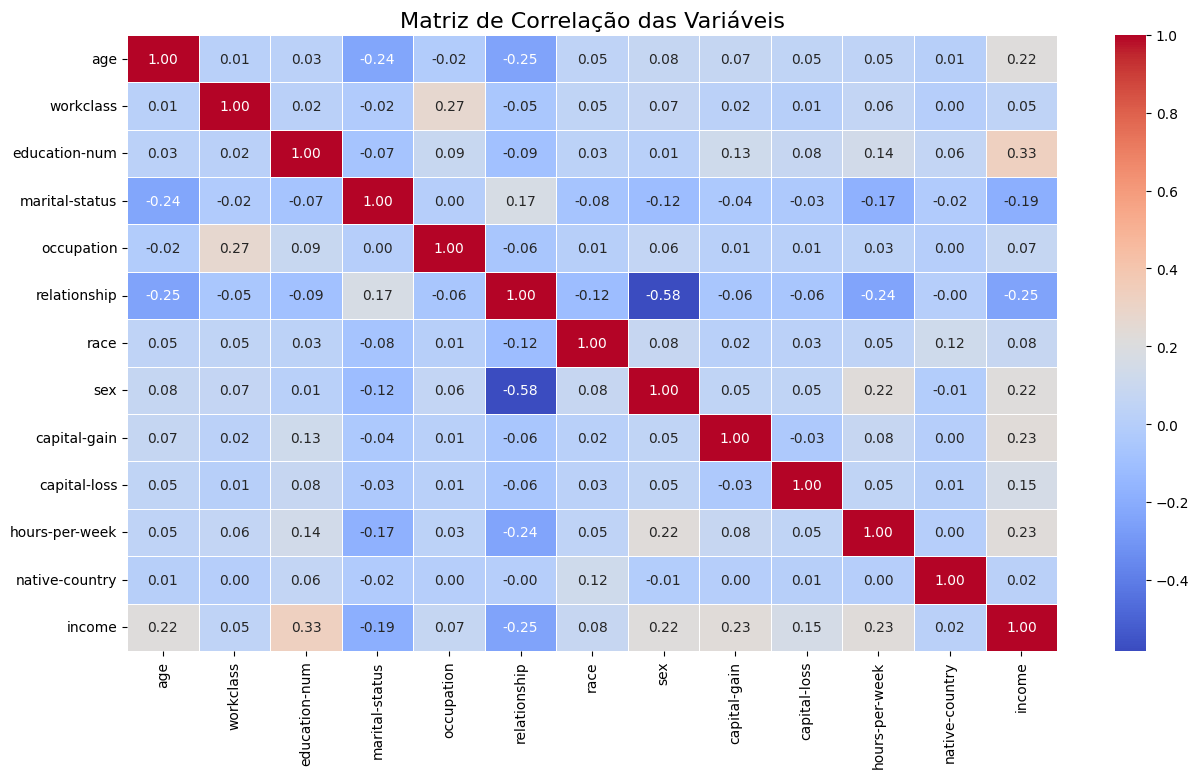

In [ ]:
corr_matrix = df.drop(columns=['education']).corr()

plt.figure(figsize=(15, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)

plt.title('Matriz de Correlação das Variáveis', fontsize=16)
plt.show()

O gráfico abaixo mostra a distribuição de income de acordo com as horas trabalhadas por semana e a idade. É notável que, entre os 20 e 30 anos, há poucas pessoas que recebem acima de 50K. A maior concentração de pessoas com renda superior a 50K ocorre entre os 30 e 60 anos.

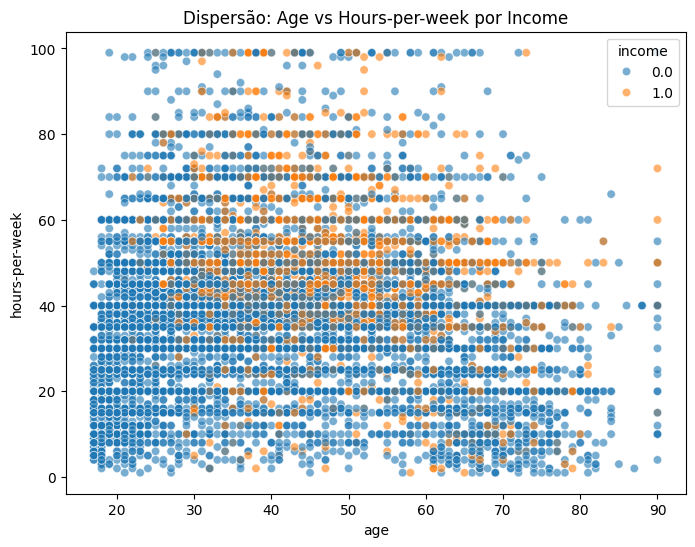

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='age',
    y='hours-per-week',
    hue='income',
    alpha=0.6
)
plt.title('Dispersão: Age vs Hours-per-week por Income')
plt.show()


Pessoas com renda maior que 50K tendem a apresentar maior nível de escolaridade em comparação às pessoas com renda menor ou igual 50K, mostrando a relação entre essas duas variáveis que foi vista no mapa de correlação.

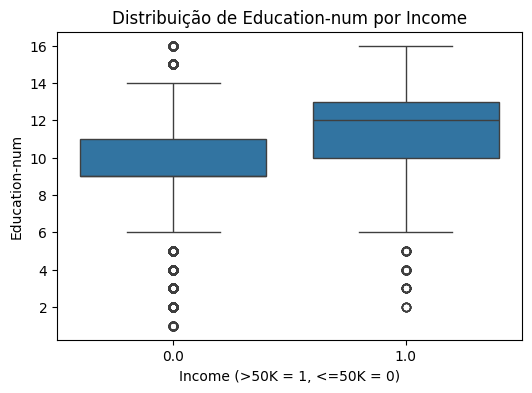

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='income', y='education-num', data=df)
plt.title("Distribuição de Education-num por Income")
plt.xlabel("Income (>50K = 1, <=50K = 0)")
plt.ylabel("Education-num")
plt.show()


###Normalização

Primeiro achei melhor plotar os gráficos das distribuições originais das variáveis numéricas no dataset, pra avaliar a normalidade

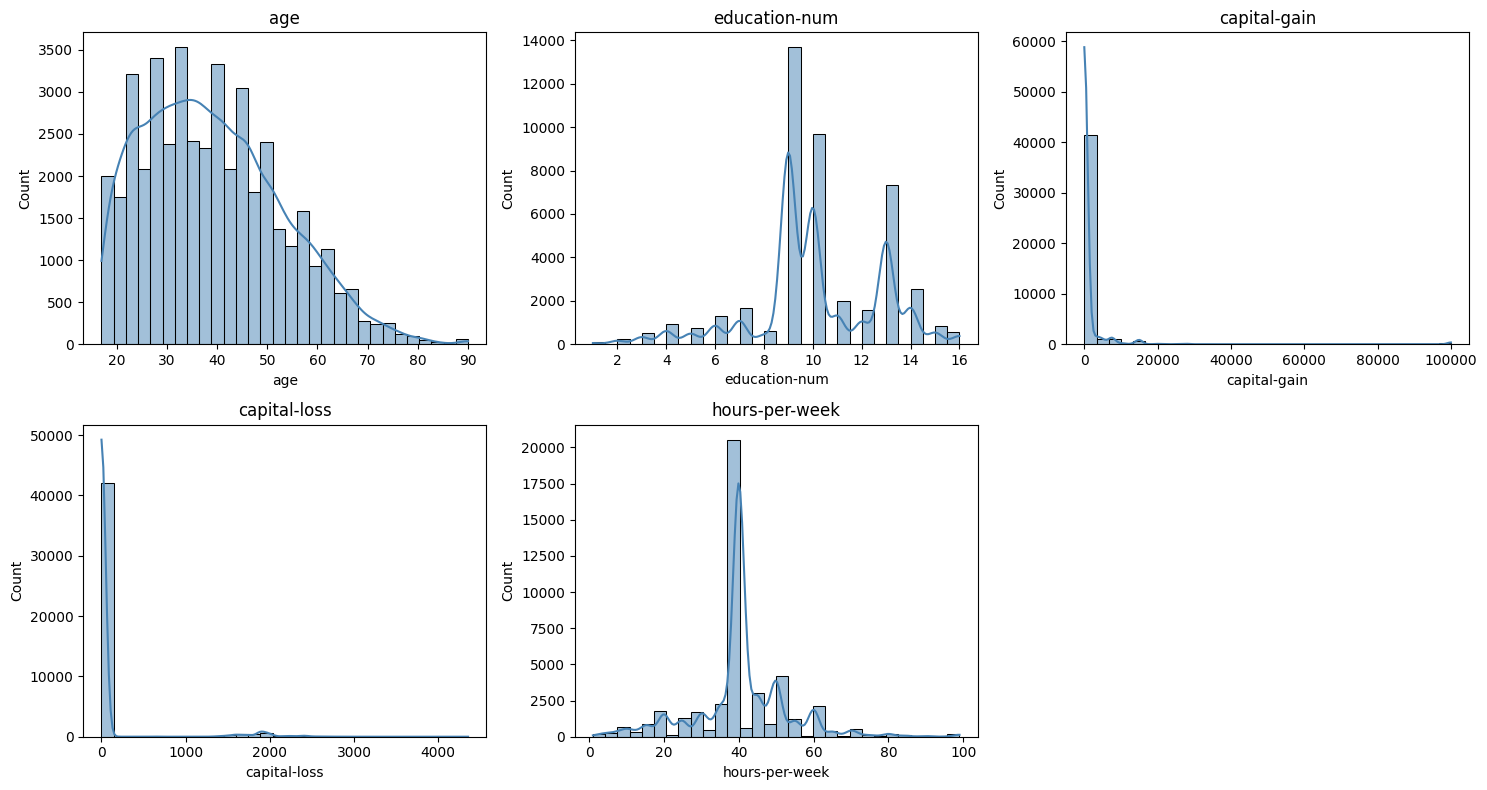

In [ ]:
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_num = df[num_cols]

plt.figure(figsize=(15,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_num[col], bins=30, kde=True, color="steelblue")
    plt.title(col)

plt.tight_layout()
plt.show()

Normalizei cada coluna com um tipo diferente de scaler aprendido na aula

Olhando agora os dados normalizados por colunas, começando pela coluna idade que já apresenta uma distribuição próxima do normal, então a normalização não causou tanto impacto. Por isso, a melhor opção seria o StandardScaler, que é o padrão para a maioria dos algoritmos.

Seguindo raciocínio parecido, a distribuição da coluna "education-num" também não mudou drasticamente. Assim, o StandardScaler seria a melhor escolha para essa variável.

Para "capital-gain" e "capital-loss", os dados são muito concentrados no zero, o que dificulta a normalização. Nesse caso, a melhor escolha seria o MinMaxScaler ou o MaxAbsScaler, já que o intervalo de ambos vai de 0 a 1, representando melhor a distribuição nessas variáveis.

Já para a coluna "hours-per-week", todos performaram de forma bem parecida. Porém, o StandardScaler e o MinMaxScaler conseguiram seguir mais a distribuição normal. Como o StandardScaler é o mais padrão, ele pode ser usado sem problemas.

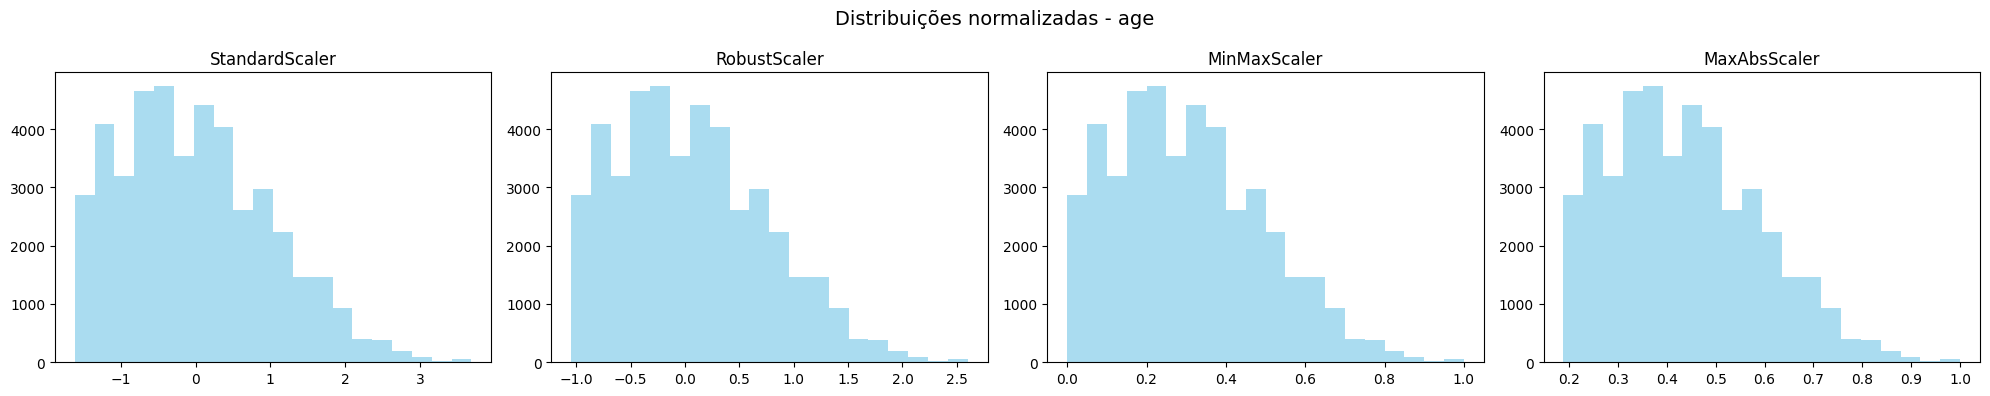

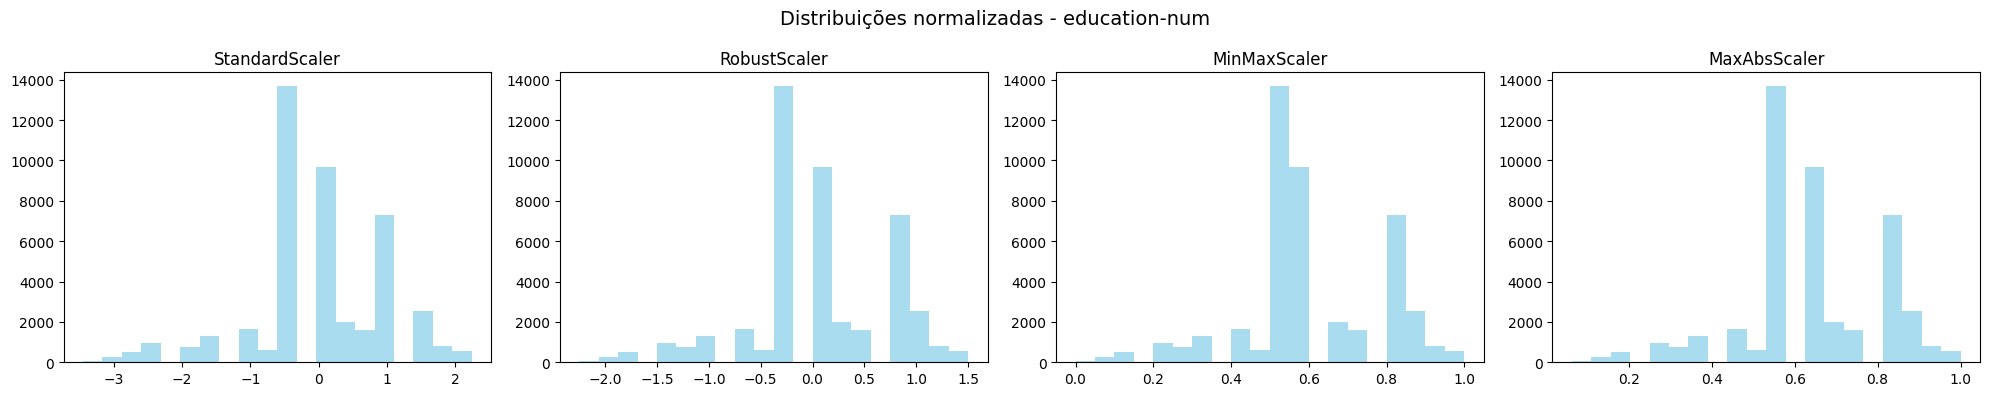

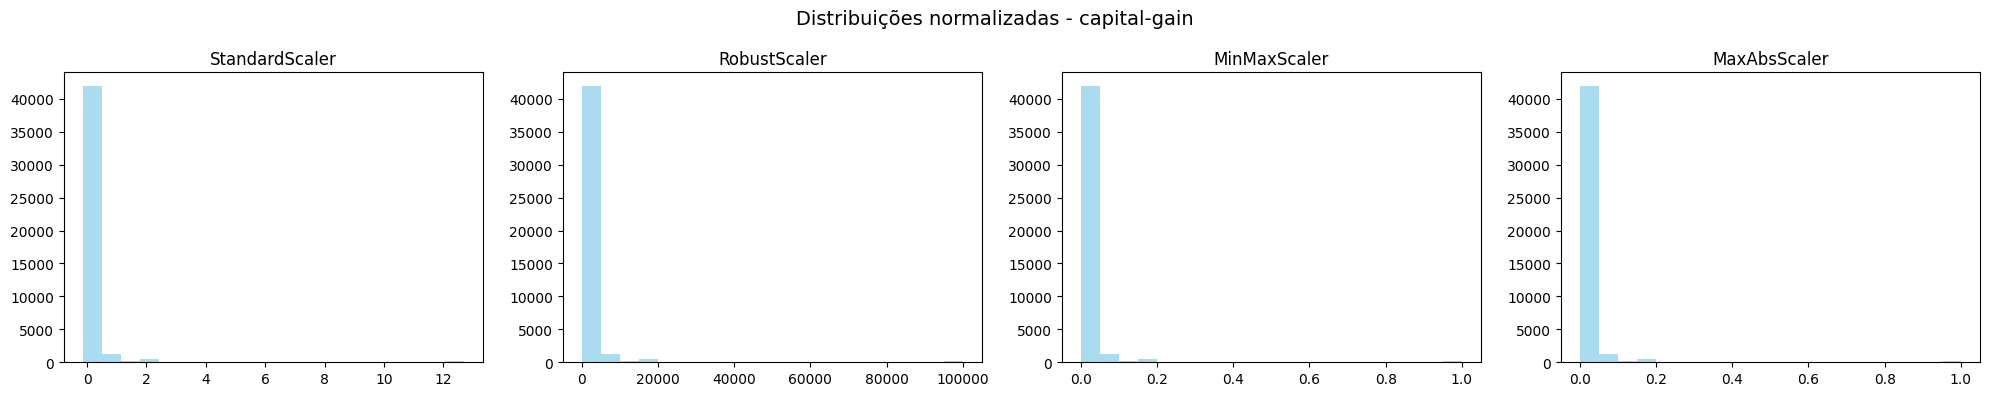

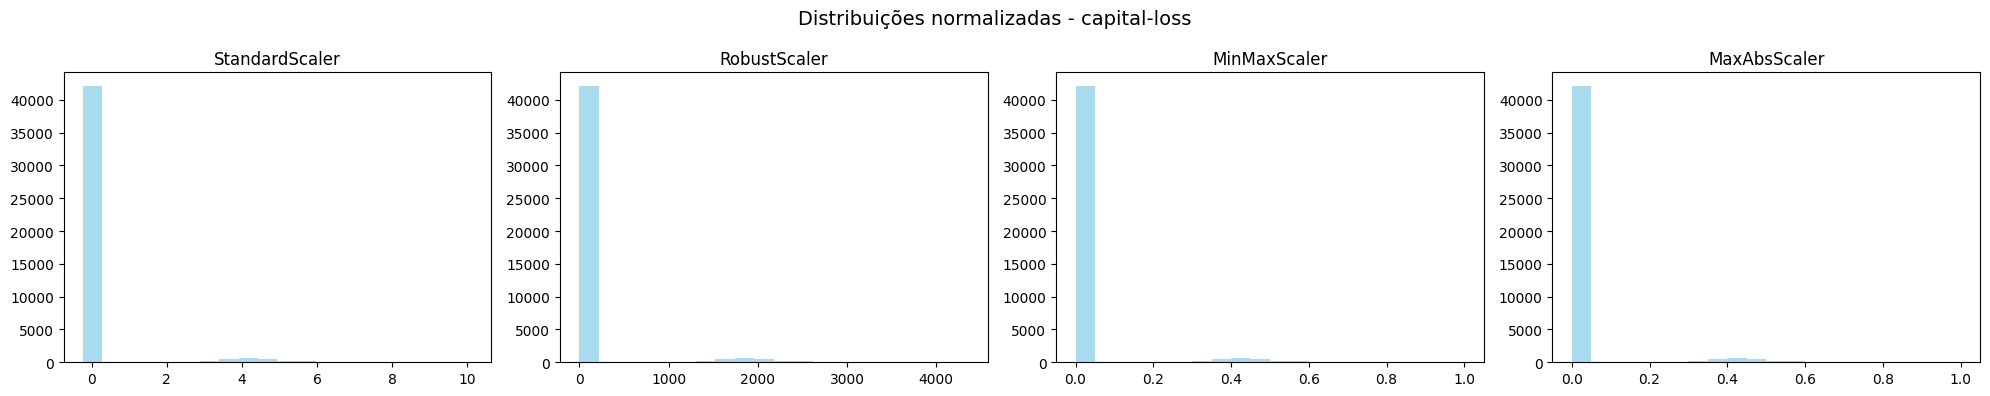

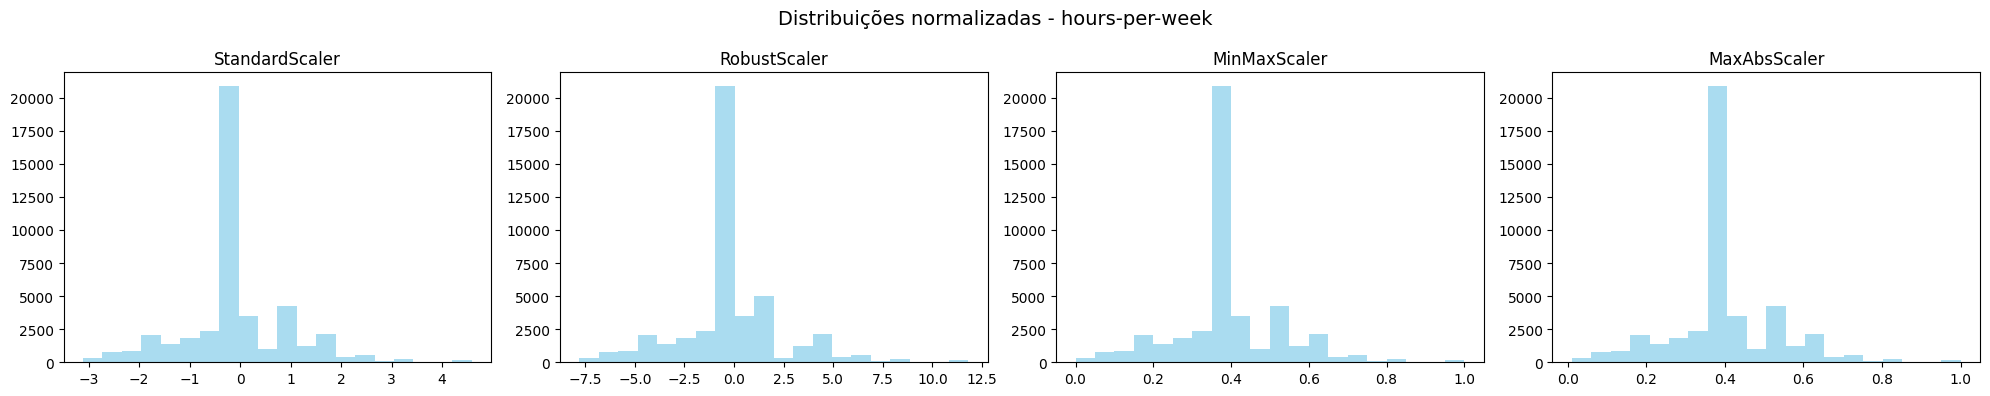

In [ ]:
cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
}

def plot_scaled_distributions(df, col):
    fig, axes = plt.subplots(1, len(scalers), figsize=(20, 4))
    fig.suptitle(f"Distribuições normalizadas - {col}", fontsize=14)

    for i, (name, scaler) in enumerate(scalers.items()):
        transformed = scaler.fit_transform(df[[col]])
        axes[i].hist(transformed, bins=20, color="skyblue", alpha=0.7)
        axes[i].set_title(name)


    plt.tight_layout()
    plt.show()

for column in cols:
    plot_scaled_distributions(df, column)
